DS GA 1007 Final Project

In [81]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import LinearRegression
from scipy import stats
from statistics import median
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf

Join the datasets across years and then merge on player name and year

In [82]:
# Join the bat tracking datasets across years
bat_df_2025 = pd.read_csv('bat_tracking_2025.csv')
bat_df_2025['year'] = 2025
bat_df_2024 = pd.read_csv('bat_tracking_2024.csv')
bat_df_2024['year'] = 2024
bat_df_2023 = pd.read_csv('bat_tracking_2023.csv')
bat_df_2023['year'] = 2023
bat_df_full = pd.concat([bat_df_2025, bat_df_2024, bat_df_2023], ignore_index=True)
bat_df_full

,id,name,swings_competitive,percent_swings_competitive,contact,avg_bat_speed,hard_swing_rate,squared_up_per_bat_contact,squared_up_per_swing,blast_per_bat_contact,blast_per_swing,swing_length,swords,batter_run_value,whiffs,whiff_per_swing,batted_ball_events,batted_ball_event_per_swing,year
0,519317,"Stanton, Giancarlo",448,0.906883,283,80.620201,0.973214,0.300353,0.189732,0.261484,0.165179,8.788955,4,9.010466,165,0.368304,141,0.314732,2025
1,665833,"Cruz, Oneil",822,0.906284,556,78.806448,0.784672,0.321942,0.217762,0.248201,0.167883,7.761988,19,-21.768531,266,0.323601,273,0.332117,2025
2,691406,"Caminero, Junior",1102,0.906996,851,78.584841,0.813067,0.289072,0.223230,0.222092,0.171506,8.420028,21,1.971819,251,0.227768,432,0.392015,2025
3,656180,"Adams, Riley",500,0.904159,341,78.304560,0.792000,0.234604,0.160000,0.181818,0.124000,7.851963,14,-22.656646,159,0.318000,148,0.296000,2025
4,691023,"Walker, Jordan",686,0.905013,465,78.069258,0.778426,0.266667,0.180758,0.200000,0.135569,8.258906,21,-19.146943,221,0.322157,231,0.336735,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,669364,"Edwards, Xavier",97,0.898148,76,64.026054,0.010309,0.342105,0.268041,0.026316,0.020619,6.211680,4,-6.257673,21,0.216495,37,0.381443,2023
1888,650333,"Arraez, Luis",407,0.896476,374,63.837034,0.002457,0.491979,0.452088,0.072193,0.066339,5.866538,3,-7.855588,33,0.081081,210,0.515971,2023
1889,664770,"Lukes, Nathan",13,0.928571,13,63.502551,0.000000,0.076923,0.076923,0.000000,0.000000,6.011915,1,-0.437373,0,0.000000,3,0.230769,2023
1890,664670,"Lopez, Alejo",2,1.000000,2,61.909735,0.000000,0.500000,0.500000,0.000000,0.000000,5.000840,0,0.782719,0,0.000000,1,0.500000,2023


In [83]:
# Join the sprint speed datasets across years
sprint_df_2025 = pd.read_csv('sprint_speed_2025.csv')
sprint_df_2025['year'] = 2025
sprint_df_2024 = pd.read_csv('sprint_speed_2024.csv')
sprint_df_2024['year'] = 2024
sprint_df_2023 = pd.read_csv('sprint_speed_2023.csv')
sprint_df_2023['year'] = 2023
sprint_df_full = pd.concat([sprint_df_2025, sprint_df_2024, sprint_df_2023], ignore_index=True)
sprint_df_full.rename(columns={'last_name, first_name': 'name'}, inplace=True)
sprint_df_full

,name,player_id,team_id,team,position,age,competitive_runs,bolts,hp_to_1b,sprint_speed,year
0,"Turner, Trea",607208,143,PHI,SS,32,265,117.0,4.22,30.3,2025
1,"Scott II, Victor",687363,138,STL,CF,24,141,87.0,4.13,30.2,2025
2,"Witt Jr., Bobby",677951,118,KC,SS,25,245,101.0,4.15,30.2,2025
3,"Buxton, Byron",621439,142,MIN,CF,31,165,56.0,4.13,30.2,2025
4,"Hill, Derek",656537,145,CWS,CF,29,50,24.0,4.21,30.1,2025
...,...,...,...,...,...,...,...,...,...,...,...
1832,"Cabrera, Miguel",408234,116,DET,DH,40,127,NaN,5.09,23.1,2023
1833,"Aguilar, Jesús",542583,133,OAK,1B,33,27,NaN,NaN,23.0,2023
1834,"Grandal, Yasmani",518735,145,CWS,C,34,129,NaN,5.14,22.8,2023
1835,"León, Sandy",506702,140,TEX,C,34,11,NaN,NaN,22.7,2023


In [84]:
# Merge the datasets on player name and year
merged_df = pd.merge(bat_df_full, sprint_df_full, on=['name', 'year'], how='inner')
merged_df

,id,name,swings_competitive,percent_swings_competitive,contact,avg_bat_speed,hard_swing_rate,squared_up_per_bat_contact,squared_up_per_swing,blast_per_bat_contact,...,year,player_id,team_id,team,position,age,competitive_runs,bolts,hp_to_1b,sprint_speed
0,519317,"Stanton, Giancarlo",448,0.906883,283,80.620201,0.973214,0.300353,0.189732,0.261484,...,2025,519317,147,NYY,DH,35,62,NaN,5.22,23.5
1,665833,"Cruz, Oneil",822,0.906284,556,78.806448,0.784672,0.321942,0.217762,0.248201,...,2025,665833,134,PIT,CF,26,164,42.0,4.26,29.2
2,691406,"Caminero, Junior",1102,0.906996,851,78.584841,0.813067,0.289072,0.223230,0.222092,...,2025,691406,139,TB,3B,21,252,NaN,4.62,26.7
3,656180,"Adams, Riley",500,0.904159,341,78.304560,0.792000,0.234604,0.160000,0.181818,...,2025,656180,120,WSH,C,29,79,NaN,4.58,26.6
4,691023,"Walker, Jordan",686,0.905013,465,78.069258,0.778426,0.266667,0.180758,0.200000,...,2025,691023,138,STL,RF,23,136,2.0,4.40,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774,683021,"Stefanic, Michael",73,0.901235,69,64.524445,0.013699,0.507246,0.479452,0.043478,...,2023,683021,108,LAA,2B,27,31,NaN,4.62,26.0
1775,680757,"Kwan, Steven",448,0.899598,408,64.083518,0.002232,0.450980,0.410714,0.046569,...,2023,680757,114,CLE,LF,25,334,3.0,4.22,28.1
1776,669364,"Edwards, Xavier",97,0.898148,76,64.026054,0.010309,0.342105,0.268041,0.026316,...,2023,669364,146,MIA,2B,23,37,3.0,4.18,28.2
1777,650333,"Arraez, Luis",407,0.896476,374,63.837034,0.002457,0.491979,0.452088,0.072193,...,2023,650333,146,MIA,2B,26,269,NaN,4.57,26.1


To-do:
    do basic linear regression analysis
    split by sprint speed and run a t-test
    split my age and find some way to compare, maybe compare sprint speeds older and youger and bat speed younger older and see trends

In [85]:
bat_speed = merged_df['avg_bat_speed'].to_numpy()
sprint_speed = merged_df['sprint_speed'].to_numpy().reshape(-1, 1)
model = LinearRegression()
model.fit(sprint_speed, bat_speed)
print(f"Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

Coefficient (slope): 0.12
Intercept: 67.94


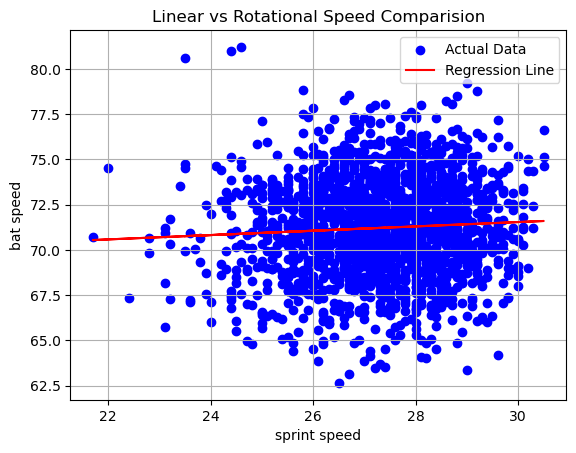

In [86]:
plt.scatter(merged_df['sprint_speed'], merged_df['avg_bat_speed'], color='blue', label='Actual Data')
plt.plot(sprint_speed, model.predict(sprint_speed), color='red', label='Regression Line')
plt.xlabel('sprint speed')
plt.ylabel('bat speed')
plt.title('Linear vs Rotational Speed Comparision')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
median_sprint_speed = median(sprint_speed)[0]
fast_df = merged_df[merged_df['sprint_speed'] >= median_sprint_speed]
slow_df = merged_df[merged_df['sprint_speed'] < median_sprint_speed]
t_statistic, p_value = stats.ttest_ind(fast_df['avg_bat_speed'], slow_df['avg_bat_speed'], equal_var=True)
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 1.4119
P-value: 0.1581


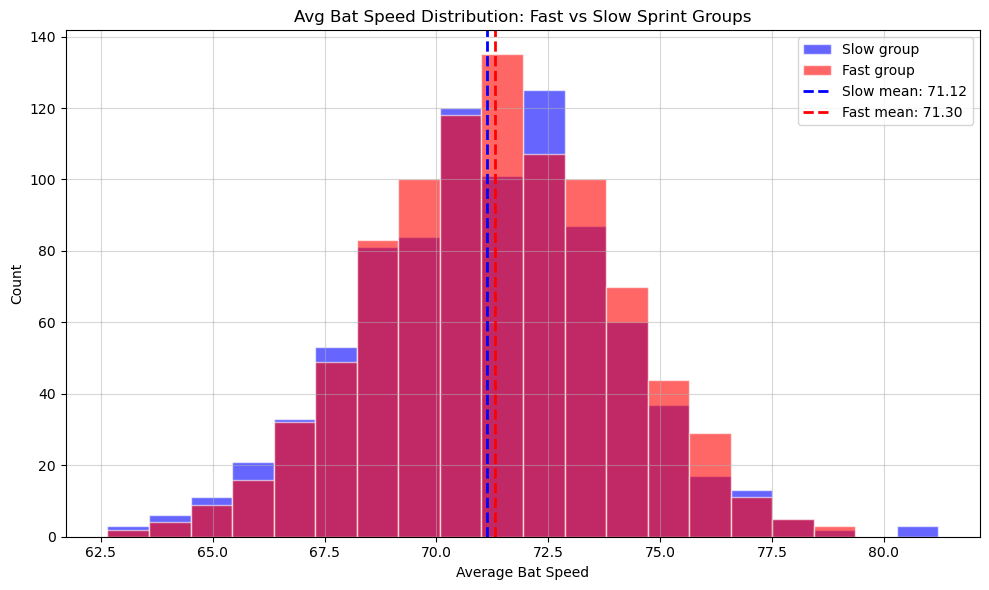

In [88]:
# Layered histogram of avg_bat_speed for slow vs fast groups with means marked
fig, ax = plt.subplots(figsize=(10, 6))
fast_speeds = fast_df['avg_bat_speed'].dropna()
slow_speeds = slow_df['avg_bat_speed'].dropna()

# Compute means
fast_mean = fast_speeds.mean() if len(fast_speeds) else np.nan
slow_mean = slow_speeds.mean() if len(slow_speeds) else np.nan

# Choose common bins based on the combined data for comparability
combined = pd.concat([fast_speeds, slow_speeds])
bins = 20 if combined.empty else np.linspace(combined.min(), combined.max(), 21)

# Plot histograms
ax.hist(slow_speeds, bins=bins, alpha=0.6, color='blue', label='Slow group', edgecolor='white')
ax.hist(fast_speeds, bins=bins, alpha=0.6, color='red', label='Fast group', edgecolor='white')

# Plot mean lines
ax.axvline(slow_mean, color='blue', linestyle='--', linewidth=2, label=f'Slow mean: {slow_mean:.2f}')
ax.axvline(fast_mean, color='red', linestyle='--', linewidth=2, label=f'Fast mean: {fast_mean:.2f}')

ax.set_title('Avg Bat Speed Distribution: Fast vs Slow Sprint Groups')
ax.set_xlabel('Average Bat Speed')
ax.set_ylabel('Count')
ax.legend()
ax.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

In [89]:
_75th_percentile_sprint_speed = np.percentile(sprint_speed, 75)
fast_df = merged_df[merged_df['sprint_speed'] >= _75th_percentile_sprint_speed]
slow_df = merged_df[merged_df['sprint_speed'] < _75th_percentile_sprint_speed]
t_statistic, p_value = stats.ttest_ind(fast_df['avg_bat_speed'], slow_df['avg_bat_speed'], equal_var=True)
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 1.1452
P-value: 0.2523


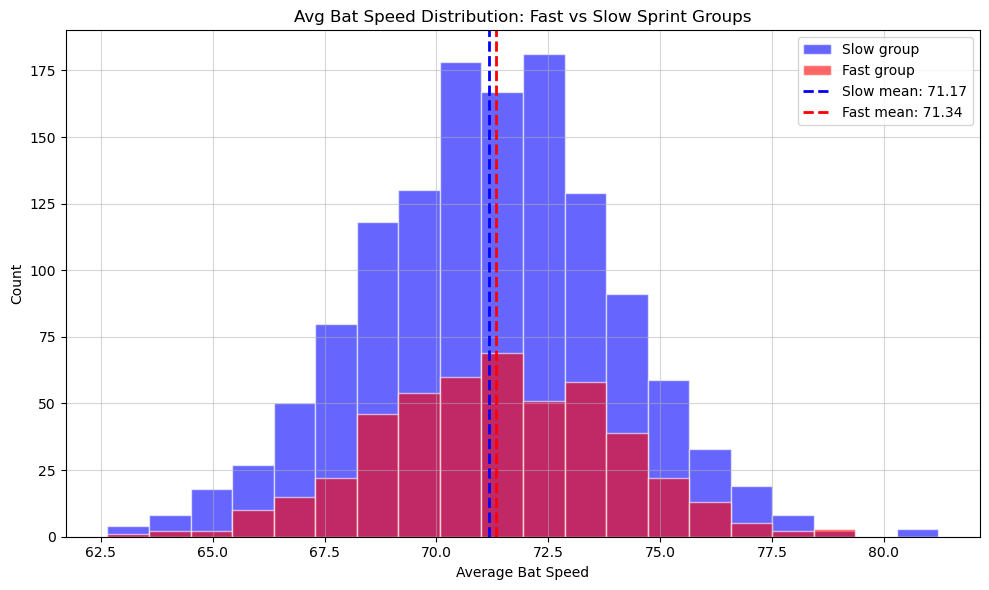

In [90]:
# Layered histogram of avg_bat_speed for slow vs fast groups with means marked
fig, ax = plt.subplots(figsize=(10, 6))
fast_speeds = fast_df['avg_bat_speed'].dropna()
slow_speeds = slow_df['avg_bat_speed'].dropna()

# Compute means
fast_mean = fast_speeds.mean() if len(fast_speeds) else np.nan
slow_mean = slow_speeds.mean() if len(slow_speeds) else np.nan

# Choose common bins based on the combined data for comparability
combined = pd.concat([fast_speeds, slow_speeds])
bins = 20 if combined.empty else np.linspace(combined.min(), combined.max(), 21)

# Plot histograms
ax.hist(slow_speeds, bins=bins, alpha=0.6, color='blue', label='Slow group', edgecolor='white')
ax.hist(fast_speeds, bins=bins, alpha=0.6, color='red', label='Fast group', edgecolor='white')

# Plot mean lines
ax.axvline(slow_mean, color='blue', linestyle='--', linewidth=2, label=f'Slow mean: {slow_mean:.2f}')
ax.axvline(fast_mean, color='red', linestyle='--', linewidth=2, label=f'Fast mean: {fast_mean:.2f}')

ax.set_title('Avg Bat Speed Distribution: Fast vs Slow Sprint Groups')
ax.set_xlabel('Average Bat Speed')
ax.set_ylabel('Count')
ax.legend()
ax.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

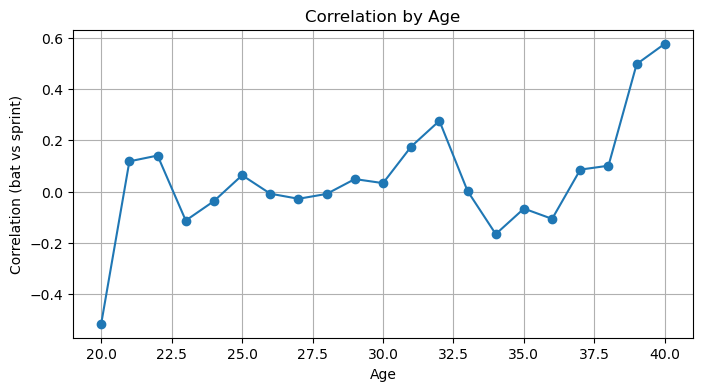

In [91]:
# Correlation by age
age_corr = (
    merged_df
    .dropna(subset=['avg_bat_speed', 'sprint_speed', 'age'])
    .groupby('age')[['avg_bat_speed', 'sprint_speed']]
    .corr()
    .iloc[::2, -1]  # corr between avg_bat_speed and sprint_speed per age
    .reset_index()
    .rename(columns={'level_1': 'metric', 'sprint_speed': 'corr'})
)
plt.figure(figsize=(8,4))
plt.plot(age_corr['age'], age_corr['corr'], marker='o')
plt.xlabel('Age')
plt.ylabel('Correlation (bat vs sprint)')
plt.title('Correlation by Age')
plt.grid(True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:          avg_bat_speed   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     9.213
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           4.78e-06
Time:                        00:01:04   Log-Likelihood:                -4296.1
No. Observations:                1779   AIC:                             8600.
Df Residuals:                    1775   BIC:                             8622.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           74.9151      9.227  

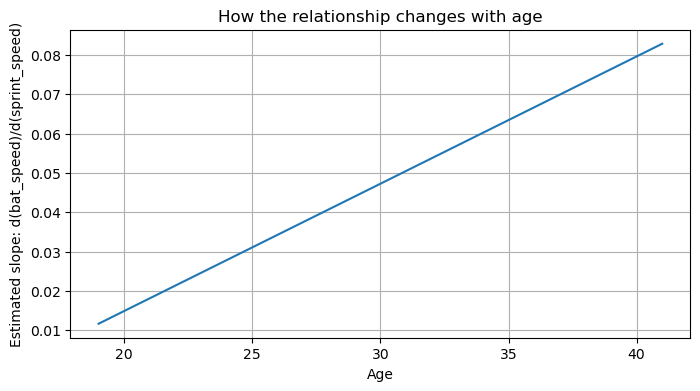

In [92]:
df = merged_df.dropna(subset=['avg_bat_speed', 'sprint_speed', 'age']).copy()
model = smf.ols('avg_bat_speed ~ sprint_speed * age', data=df).fit()
print(model.summary())

# Visualize fitted slope vs age
ages = np.linspace(df['age'].min(), df['age'].max(), 50)
slope_vs_age = model.params['sprint_speed'] + model.params['sprint_speed:age'] * ages
plt.figure(figsize=(8,4))
plt.plot(ages, slope_vs_age)
plt.xlabel('Age')
plt.ylabel('Estimated slope: d(bat_speed)/d(sprint_speed)')
plt.title('How the relationship changes with age')
plt.grid(True)
plt.show()

/var/folders/8q/pd8bhfh923x7_5hc541qy_8c0000gn/T/ipykernel_1855/806036180.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_bin', 'name'])


              mean    median  count
age_bin                            
(18, 24]  0.748631  0.495446    103
(24, 27] -0.203408  0.162472    175
(27, 30]  0.159388  0.234048    135
(30, 35] -0.084635 -0.057143    111
(35, 45]  0.316635  0.357960     12


/var/folders/8q/pd8bhfh923x7_5hc541qy_8c0000gn/T/ipykernel_1855/806036180.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(slope)
/var/folders/8q/pd8bhfh923x7_5hc541qy_8c0000gn/T/ipykernel_1855/806036180.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = slopes.groupby('age_bin')['slope'].agg(['mean','median','count'])


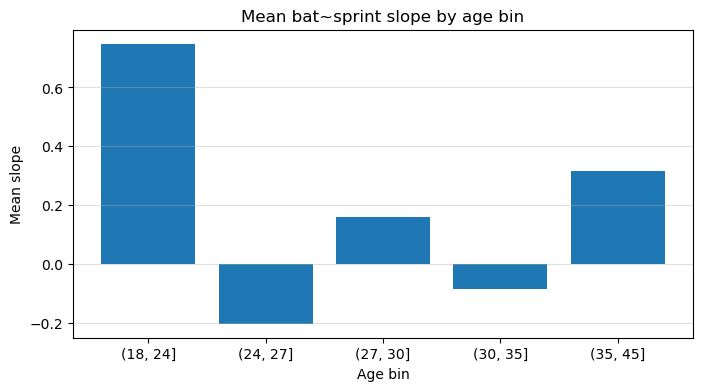

In [93]:
# Per-player age-binned slopes
bins = [18, 24, 27, 30, 35, 45]
df = merged_df.dropna(subset=['avg_bat_speed', 'sprint_speed', 'age', 'name']).copy()
df['age_bin'] = pd.cut(df['age'], bins=bins)

def slope(x):
    if len(x) < 2: return np.nan
    X = sm.add_constant(x['sprint_speed'])
    y = x['avg_bat_speed']
    return sm.OLS(y, X).fit().params['sprint_speed']

slopes = (
    df.groupby(['age_bin', 'name'])
      .apply(slope)
      .reset_index(name='slope')
)

# Aggregate across players per age bin
summary = slopes.groupby('age_bin')['slope'].agg(['mean','median','count'])
print(summary)

# Plot mean slope by age bin
plt.figure(figsize=(8,4))
plt.bar(summary.index.astype(str), summary['mean'])
plt.xlabel('Age bin')
plt.ylabel('Mean slope')
plt.title('Mean bat~sprint slope by age bin')
plt.grid(True, axis='y', alpha=0.4)
plt.show()

In [98]:
bat_speed = merged_df['avg_bat_speed'].to_numpy()
sprint_speed = merged_df['sprint_speed'].to_numpy().reshape(-1, 1)
lr_model = LinearRegression()
lr_model.fit(sprint_speed, bat_speed)
print(f"Coefficient (slope): {lr_model.coef_[0]:.2f}")
print(f"Intercept: {lr_model.intercept_:.2f}")

Coefficient (slope): 0.12
Intercept: 67.94


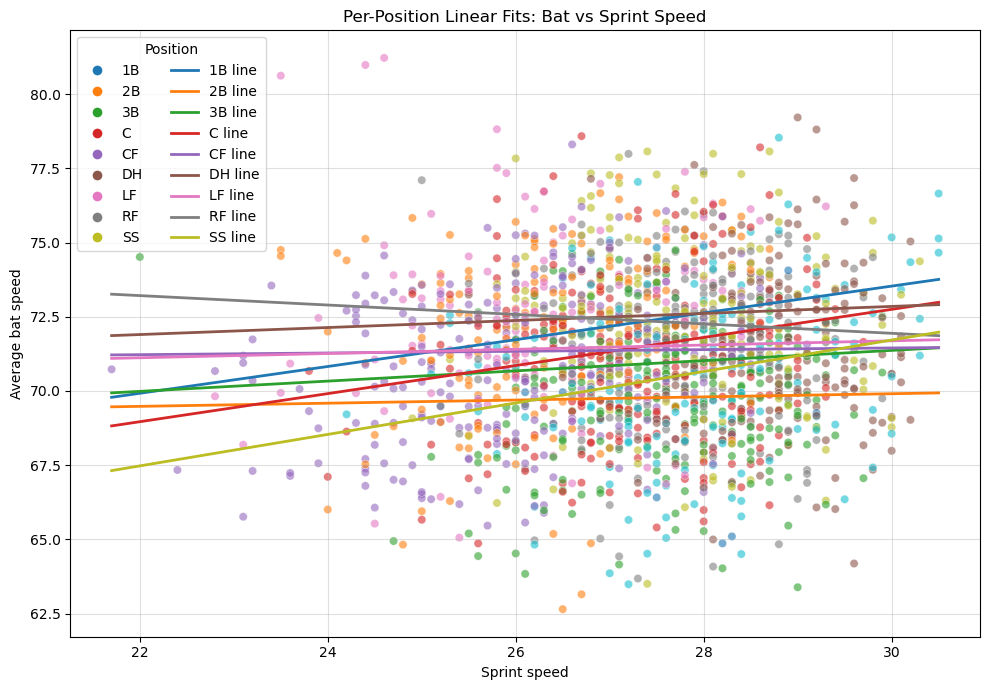

C: n=253, slope=0.473, intercept=58.56, corr=0.252
SS: n=175, slope=0.530, intercept=55.82, corr=0.229
1B: n=168, slope=0.451, intercept=59.99, corr=0.192
3B: n=226, slope=0.172, intercept=66.19, corr=0.070
RF: n=201, slope=-0.159, intercept=76.70, corr=-0.062
DH: n=136, slope=0.118, intercept=69.29, corr=0.053
2B: n=216, slope=0.053, intercept=68.31, corr=0.026
LF: n=198, slope=0.071, intercept=69.55, corr=0.026
CF: n=199, slope=0.028, intercept=70.60, corr=0.010


In [100]:
# Per-position regressions and overlayed lines
positions = merged_df['position'].astype('category')
pos_codes = positions.cat.codes
cmap = plt.get_cmap('tab10')

plt.figure(figsize=(10,7))
# Scatter colored by position
plt.scatter(
    merged_df['sprint_speed'],
    merged_df['avg_bat_speed'],
    c=pos_codes,
    cmap=cmap,
    alpha=0.6,
    edgecolor='white',
    linewidth=0.4
)

# Fit and plot a line for each position
x_all = merged_df['sprint_speed'].to_numpy().reshape(-1, 1)
x_min, x_max = np.nanmin(x_all), np.nanmax(x_all)
x_line = np.linspace(x_min, x_max, 100).reshape(-1, 1)

results = []
for code, pos in enumerate(positions.cat.categories):
    sub = merged_df[merged_df['position'] == pos].dropna(subset=['sprint_speed','avg_bat_speed'])
    if len(sub) < 2:
        continue
    X = sub['sprint_speed'].to_numpy().reshape(-1, 1)
    y = sub['avg_bat_speed'].to_numpy()
    reg = LinearRegression().fit(X, y)
    y_line = reg.predict(x_line)
    plt.plot(x_line, y_line, color=cmap(code), linewidth=2, label=f'{pos} line')

    # Collect stats
    corr = np.corrcoef(sub['sprint_speed'], sub['avg_bat_speed'])[0,1]
    results.append((pos, reg.coef_[0], reg.intercept_, corr, len(sub)))

# Legend: points + lines per position
point_handles = [plt.Line2D([0],[0], marker='o', color='w',
                            markerfacecolor=cmap(code), markersize=8)
                 for code in range(len(positions.cat.categories))]
point_labels = list(positions.cat.categories)

line_handles = [plt.Line2D([0],[0], color=cmap(code), linewidth=2)
                for code in range(len(positions.cat.categories))]
line_labels = [f'{label} line' for label in positions.cat.categories]

handles = point_handles + line_handles
labels = point_labels + line_labels

plt.legend(handles, labels, title='Position', frameon=True, ncol=2)
plt.xlabel('Sprint speed')
plt.ylabel('Average bat speed')
plt.title('Per-Position Linear Fits: Bat vs Sprint Speed')
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

# Print per-position stats sorted by absolute correlation
for pos, slope, intercept, corr, n in sorted(results, key=lambda x: abs(x[3]), reverse=True):
    print(f'{pos}: n={n}, slope={slope:.3f}, intercept={intercept:.2f}, corr={corr:.3f}')